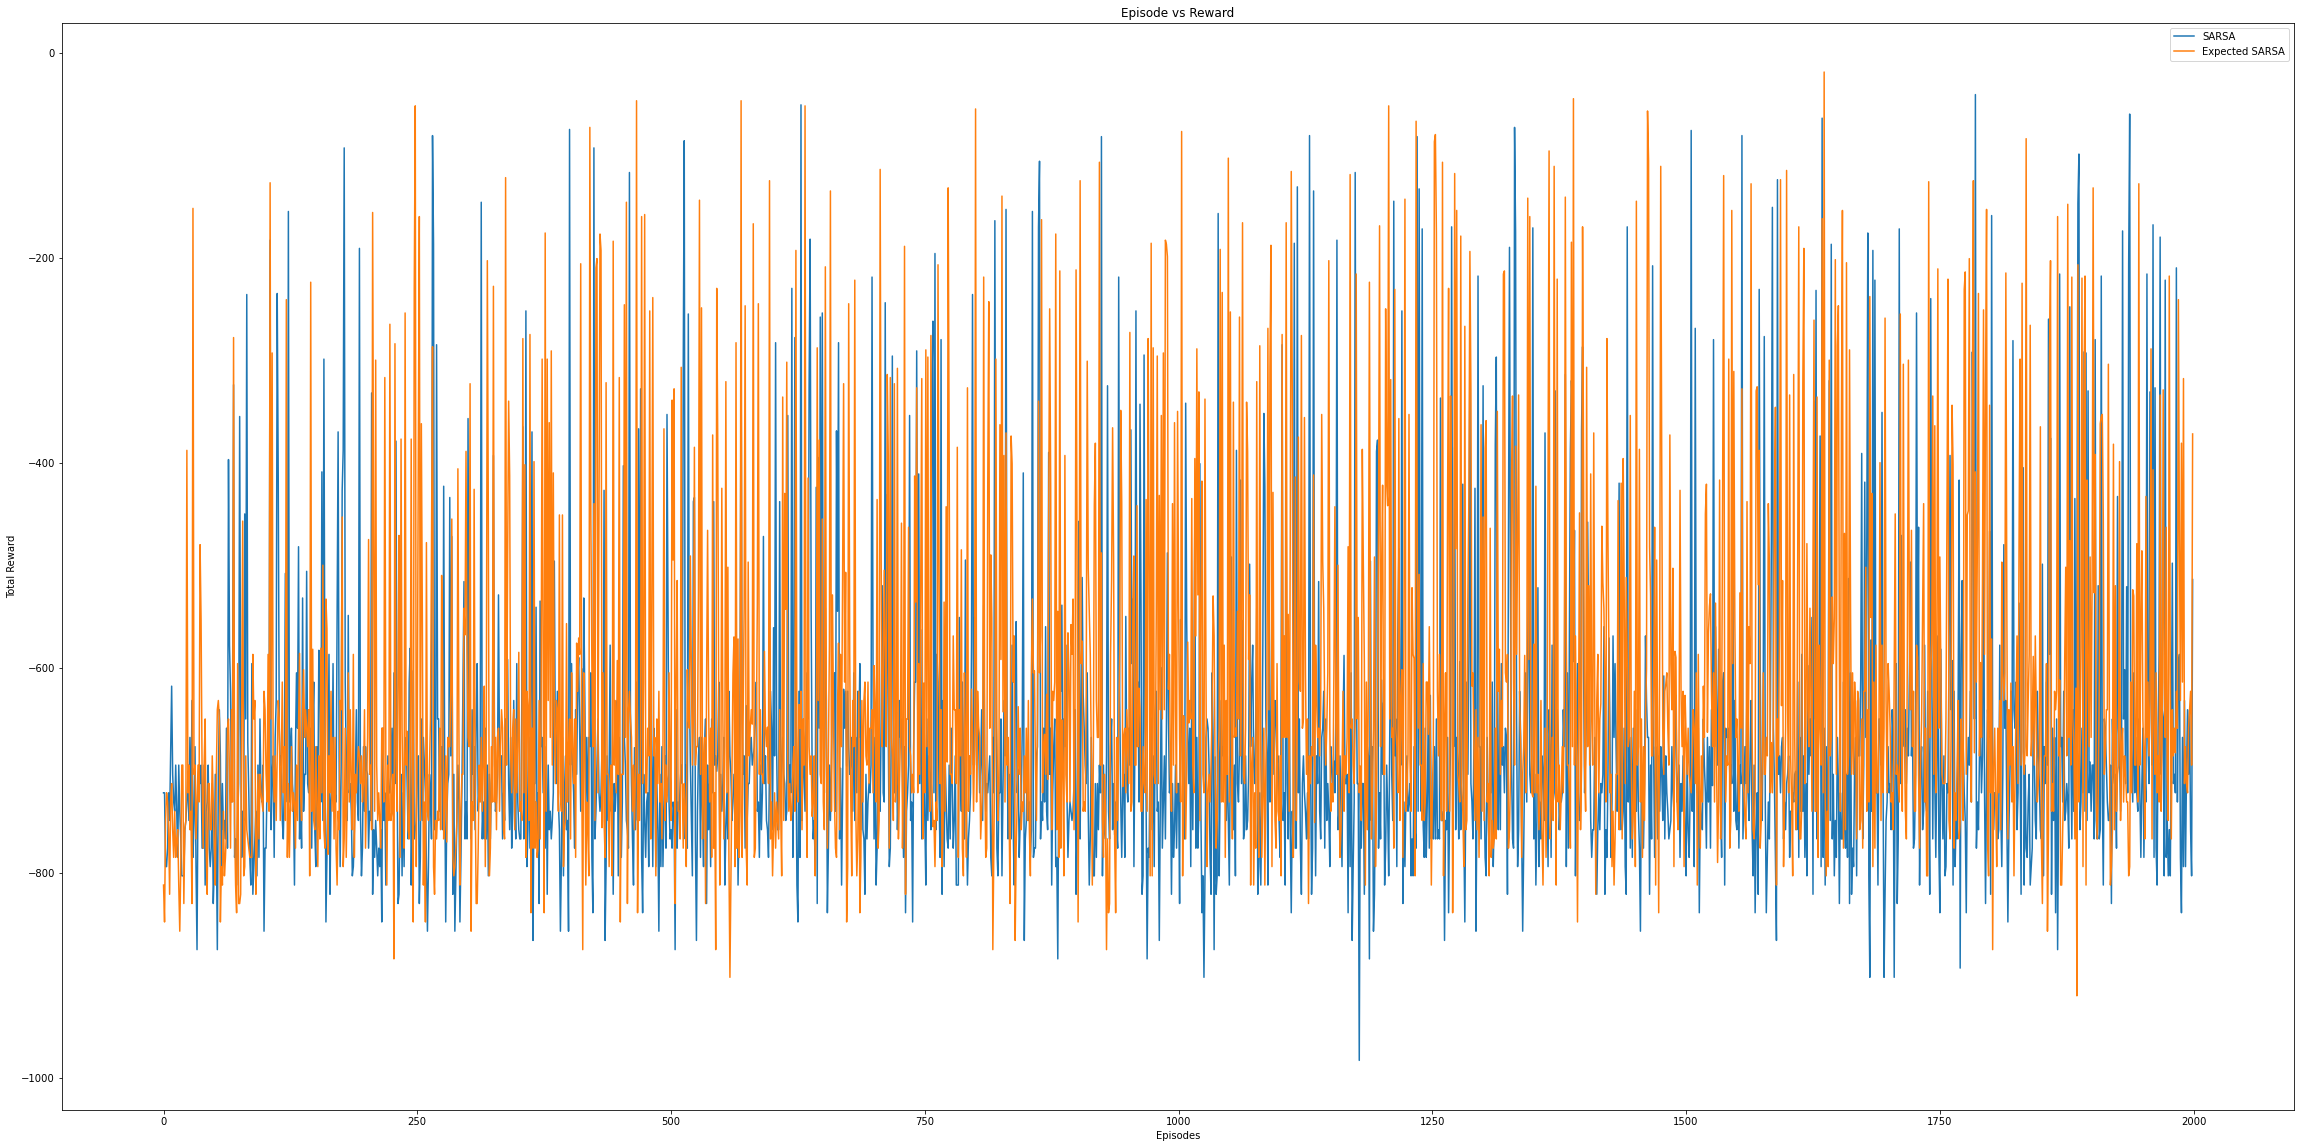

Final Q-table for SARSA:
[[  0.           0.           0.           0.           0.
    0.        ]
 [-35.98591318 -26.81217483 -32.56114976 -29.13285577 -27.44383283
  -36.6195716 ]
 [-30.1018859  -30.04099541 -33.46889201 -29.41915667 -28.37798032
  -39.72371857]
 ...
 [-30.06855209 -30.18501894 -27.27646197 -26.75323666 -38.03013893
  -41.983432  ]
 [-29.3609115  -29.65000874 -28.3428835  -27.27886926 -38.68203296
  -41.16607227]
 [-16.91528501 -19.57132679 -22.16032102   4.22845375 -18.19643192
  -22.39452992]]
Final Q-table for Expected SARSA:
[[  0.           0.           0.           0.           0.
    0.        ]
 [-31.15984187 -28.48524093 -30.76200995 -28.48438264 -28.33345144
  -37.48518388]
 [-30.77295853 -27.81110547 -30.33317536 -27.81180852 -27.05035726
  -36.80839339]
 ...
 [-29.18790088 -28.56470436 -29.18477203 -27.36866633 -38.16929126
  -38.18480061]
 [-30.6750383  -31.62398574 -30.67501619 -28.49716034 -39.67430912
  -39.67386597]
 [-15.70263357 -21.77475905 -15.7

In [8]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(0, Q.shape[1])
    else:
        return np.argmax(Q[state])

def sarsa(env, alpha, gamma, epsilon, episodes):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    
    for episode in range(episodes):
        state = env.reset()[0]
        action = epsilon_greedy(Q, state, epsilon)
        total_reward = 0
        done = False
        
        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_action = epsilon_greedy(Q, next_state, epsilon)
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            state, action = next_state, next_action
            total_reward += reward
        
        rewards.append(total_reward)
    return Q, rewards

def expected_sarsa(env, alpha, gamma, epsilon, episodes):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    
    for episode in range(episodes):
        state = env.reset()[0]
        total_reward = 0
        done = False
        
        while not done:
            action = epsilon_greedy(Q, state, epsilon)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            policy_probs = np.ones(env.action_space.n) * (epsilon / env.action_space.n)
            policy_probs[np.argmax(Q[next_state])] += (1 - epsilon)
            expected_value = np.dot(policy_probs, Q[next_state])
            Q[state, action] += alpha * (reward + gamma * expected_value - Q[state, action])
            state = next_state
            total_reward += reward
        
        rewards.append(total_reward)
    return Q, rewards

def plot_rewards(sarsa_rewards, expected_sarsa_rewards):
    plt.figure(figsize=(40,20))
    plt.plot(sarsa_rewards, label='SARSA')
    plt.plot(expected_sarsa_rewards, label='Expected SARSA')
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Episode vs Reward')
    plt.legend()
    plt.show()

def print_results(Q, algorithm_name):
    print(f"Final Q-table for {algorithm_name}:")
    print(Q)

env = gym.make('Taxi-v3')
alpha, gamma, epsilon, episodes = 0.4, 0.9, 0.9, 2000
Q_sarsa, sarsa_rewards = sarsa(env, alpha, gamma, epsilon, episodes)
Q_expected_sarsa, expected_sarsa_rewards = expected_sarsa(env, alpha, gamma, epsilon, episodes)
plot_rewards(sarsa_rewards, expected_sarsa_rewards)

print_results(Q_sarsa, "SARSA")
print_results(Q_expected_sarsa, "Expected SARSA")